In [ ]:
import simos as sos
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy as smp

### In this notebook, we will explore the basic spin physics of simple radical pair systems. We will work in the sympy framework that allows for symbolic calculations. 


Photogenerated spin-correlated radical pairs (SCRPs) are entangled electron spin pairs formed in well-defined spin states. Spin chemistry of SCRPs plays important roles in biology, $e.g.$, in solar energy harvesting by photosynthetic reaction centers, and has been implicated in the leading hypothesis for magnetoreception $via$ the radical pair mechanism (RPM) in blue-light sensitive cryptochromes. Synthetic molecules mimicking these biologically relevant species have also garnered recent interest for chemical approaches to quantum sensing, $e.g.$ of magnetic fields, and quantum information science (QIS).

### The Spinsystem 

In the simplest case, if the coupling to additional nuclear or electronic spins are neglected, the SCRP is a two-spin system consisting of just two electron spins.  
We initialise this simple system. Note that we use sympy as a method during system construction to allow for symbolic calculations. 

In [ ]:
# Spin 1 
A = {'val': 1/2, 'name':'A'} 
# Spin 2
B = {'val': 1/2 , 'name':'B'}
# Construct the system with the sympy framework
s = sos.System([A,B], method = "sympy")

All spin operators of the system have been constructed in the Zeeman basis and can be accessed as attributes of the class "s".

In [ ]:
s.Az # z-operator of the spin A  

Matrix([
[1/2,   0,    0,    0],
[  0, 1/2,    0,    0],
[  0,   0, -1/2,    0],
[  0,   0,    0, -1/2]])

The spin-dynamics of SCRPs are, however, often described in the coupled singlet-triplet representation. To access the singlet and triplet states, we define a "ghost-spin"  "C". 

In [ ]:
s.add_ghostspin("C", ["A", "B"])

We can now access singlet S and Triplet (ms=0) states in the Zeeman basis.

In [ ]:
s.C_1p[0]

Matrix([
[0,    0,    0, 0],
[0,  1/2, -1/2, 0],
[0, -1/2,  1/2, 0],
[0,    0,    0, 0]])

In [ ]:
s.C_3p[0]

Matrix([
[0,   0,   0, 0],
[0, 1/2, 1/2, 0],
[0, 1/2, 1/2, 0],
[0,   0,   0, 0]])

We can also transform any operator of the spin system from the Zeeman in to the Singlet-Triplet Basis very easily. The required transformation matrix has automatically been built when we added the "ghost_spin" to the system.  For example, we transform the singlet state by:

In [ ]:
s.C_1p[0].transform(s.toC)

Matrix([
[1, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

#### Initial States of Radical Pairs 

Spin-correlated radicals pairs are typically formed as singlets since they are formed upon electron transfer which is normally a spin-conserving process. However, if the system is chiral, the so-called chirality-induced spin-selectivity effect might induce a partial triplet-character in the initial states.
Most generally, as proposed recently by our group,6 the initial spin state of an SCRP aligned with
the external magnetic field, $\ket{\psi}$, can be expressed as

\begin{equation*}
\ket{\psi} = \cos{\alpha} \ket{S} +  e^{i\beta} \sin{\alpha} \ket{T_0} 
\end{equation*}


In [ ]:
alpha = smp.Symbol("alpha", positive = True)
beta =  smp.Symbol( "beta", positive = True)

S = sos.dm2ket(s.C_1p[0]).simplify()
T0 = sos.dm2ket(s.C_3p[0]).simplify()

psi0 = (smp.cos(alpha) * S + smp.exp(smp.I*beta)*smp.sin(alpha)*T0).simplify()
rho0 = sos.ket2dm(psi0.simplify()).simplify()

In [ ]:
rho0

Matrix([
[0,                                                                                           0,                                                                                          0, 0],
[0, -(exp(I*beta)*sin(alpha) - cos(alpha))*(exp(I*beta)*cos(alpha) - sin(alpha))*exp(-I*beta)/2, (exp(I*beta)*sin(alpha) - cos(alpha))*(exp(I*beta)*cos(alpha) + sin(alpha))*exp(-I*beta)/2, 0],
[0, -(exp(I*beta)*sin(alpha) + cos(alpha))*(exp(I*beta)*cos(alpha) - sin(alpha))*exp(-I*beta)/2, (exp(I*beta)*sin(alpha) + cos(alpha))*(exp(I*beta)*cos(alpha) + sin(alpha))*exp(-I*beta)/2, 0],
[0,                                                                                           0,                                                                                          0, 0]])

If the radical pair is $\textbf{not}$ oriented parallel to the magnetic fied but stands at polar angles ($\theta, \phi$) to the magnetic field vector, we have to modify our description of the initial state to 

\begin{equation*}
\ket{\psi} = \cos{\alpha} \ket{S} +  e^{i\beta}\sin{\alpha}( \cos{\theta} \ket{T_0}  +  e^{i\phi} \frac{\sin{\phi}}{\sqrt{2}}\ket{T_+} +e^{-i\phi} \frac{\sin{\phi}}{\sqrt{2}} \ket{T_-} ) 
\end{equation*}

While the singlet fraction is invariant under spatial rotation, the triplet states are interconverted by changing the position of the molecular axis relative to the external field. 

We further assess the occupation of the individual triplet sublevels by rotating the angle $\theta$ of a pair that is initially a pure $\ket{T_0}$ state from 0 to 360 degrees. 

In [ ]:
theta = smp.Symbol("theta")
rho_theta0 = s.C_3p[0]
rho_theta = sos.rotate_operator(s, rho_theta0, 0, theta, 0)

In [ ]:
observables = [s.C_1p[0], s.C_3p[-1], s.C_3p[0], s.C_3p[1]]
angles = np.linspace(0, np.deg2rad(361), 360)
populations = np.empty((len(angles), len(observables)), dtype = complex)

for ind_a, a in enumerate(np.linspace(0, np.deg2rad(361), 360)):
    rhoeval = rho_theta.subs(theta, a)
    for ind_o, o in enumerate(observables):
        populations[ind_a, ind_o] = sos.expect(rhoeval, o)

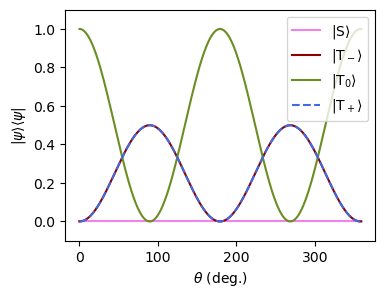

In [ ]:
fig  = plt.figure(figsize=(4,3))
plt.plot(np.real(populations[:,0]), color = "violet", label = r"|S$\rangle$")
plt.plot(np.real(populations[:,1]), color = "darkred", label = r"|T$_-\rangle$")
plt.plot(np.real(populations[:,2]), color = "olivedrab", label = r"|T$_0\rangle$")
plt.plot(np.real(populations[:,3]), color = "royalblue", ls = "dashed", label = r"|T$_+\rangle$")
plt.ylim([-0.1, 1.1])
plt.xlabel(r"$\theta$ (deg.)")
plt.ylabel(r"|$\psi\rangle$$\langle\psi$|")
plt.legend(loc = "upper right")
plt.show()

#### The Hamiltonian

We now consider the evolution of a radical pair under the Zeeman interaction and an isotropic  J-coupling. Here, we work in the laboratroy frame of reference such that the chemical shift Hamiltonians are reduced to offsets and the J coupling is reduced to the pseudosecular component. 

In [ ]:
Omega1 = smp.Symbol("Omega_1") # Chemical shift offset of spin 1
Omega2 = smp.Symbol("Omega_2") # Chemical shift offset of spin 2
J = smp.Symbol("J") # J-coupling


Hz = Omega1 * s.Az + Omega2 * s.Bz 
HJ = J * (s.Ax*s.Bx + s.Ay*s.By + s.Az*s.Bz) 
Htot = Hz + HJ 

Let us now have a look at this Hamiltonian in the Zeeman and in the Singlet Triplet basis: 

In [ ]:
Htot

Matrix([
[J/4 + Omega_1/2 + Omega_2/2,                            0,                            0,                           0],
[                          0, -J/4 + Omega_1/2 - Omega_2/2,                          J/2,                           0],
[                          0,                          J/2, -J/4 - Omega_1/2 + Omega_2/2,                           0],
[                          0,                            0,                            0, J/4 - Omega_1/2 - Omega_2/2]])

In [ ]:
Htot.transform(s.toC).simplify()

Matrix([
[                -3*J/4,                           0, -Omega_1/2 + Omega_2/2,                           0],
[                     0, J/4 + Omega_1/2 + Omega_2/2,                      0,                           0],
[-Omega_1/2 + Omega_2/2,                           0,                    J/4,                           0],
[                     0,                           0,                      0, J/4 - Omega_1/2 - Omega_2/2]])

We can easily verify that the J coupling drives transitions in the zero-quantum subspace of the Zeeman basis while differences in the g-factors of the radicals mediate Singlet-Triplet interconversion. Neither the Zeeman interaction nor the J coupling does mediate transitions between zero- and double quantum subspaces. 
For completeness, let us also evaluate the eigenvalues of this system. 

#### Influence of coupled nuclei

To gauge the influence of couplings to surrounding nuclei, we can now introduce a nuclear spin to our system that is coupled to Spin "A" of our SCRP. 

In [ ]:
# Spin 2
H = {'val': 1/2 , 'name':'H'}
A = {'val': 1/2 , 'name':'A'}
B = {'val': 1/2 , 'name':'B'}

# Construct the system:
s2 = sos.System([A,B, H], method = "sympy")
s2.add_ghostspin("C", ["A", "B"])

We define a hyperfine interaction with one of the electron spins, transform it into the singlet-triplet basis and trace out the nuclear degrees of freedom.

In [ ]:
a = smp.Symbol("a")
Hhfi = a*(s2.Hz*s2.Ax + s2.Hz*s2.Ay + s2.Hz*s2.Az )  # high field for the nucleus but not for the electron

In [ ]:
Hhfi_st = Hhfi.transform(s2.toC)
Hhfi_st_sub, _, _ = sos.subsystem(s2, Hhfi_st, [H], keep = False)

In [ ]:
Hhfi_st_sub

Matrix([
[                                                  0, sqrt(2)*a*(-1/4 - I/4)/2 + sqrt(2)*a*(1/4 + I/4)/2,                                                  0, -sqrt(2)*a*(-1/4 + I/4)/2 - sqrt(2)*a*(1/4 - I/4)/2],
[ sqrt(2)*a*(1/4 - I/4)/2 + sqrt(2)*a*(-1/4 + I/4)/2,                                                  0, sqrt(2)*a*(1/4 - I/4)/2 + sqrt(2)*a*(-1/4 + I/4)/2,                                                   0],
[                                                  0, sqrt(2)*a*(-1/4 - I/4)/2 + sqrt(2)*a*(1/4 + I/4)/2,                                                  0,  sqrt(2)*a*(1/4 - I/4)/2 + sqrt(2)*a*(-1/4 + I/4)/2],
[-sqrt(2)*a*(1/4 + I/4)/2 - sqrt(2)*a*(-1/4 - I/4)/2,                                                  0, sqrt(2)*a*(-1/4 - I/4)/2 + sqrt(2)*a*(1/4 + I/4)/2,                                                   0]])

Clearly, the hyperfine interaction also mediates transitions from the zero- into the double quantum subspace. 

## Next steps

This notebook provides an introduction on how to assess the spin physics of spin-correlated radical pairs with the symbolic backend of SimOS. You may continue from here to explore your system of interest. 